<a href="https://colab.research.google.com/github/akatjizeu/Data-Science/blob/main/deakin-bridging/business-stats/ENews_Express_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

## Import all the necessary libraries

In [2]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 numpy==1.25.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



## Reading the Data into a DataFrame

In [4]:
data = pd.read_csv('abtest.csv')
data.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* There are 4 object variables(**group, landing_page, converted, langague_preferred**) in our dataset and only one usable integer variable(**time_spent_on_the_page**)
* The **user_id** column is just an identifier it has no significant value in our problem resolution efforts, so we will drop it.

In [27]:
#Drop the user_is column
data.drop('user_id', axis=1, inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   group                   100 non-null    category
 1   landing_page            100 non-null    category
 2   time_spent_on_the_page  100 non-null    float64 
 3   converted               100 non-null    category
 4   language_preferred      100 non-null    category
dtypes: category(4), float64(1)
memory usage: 1.8 KB


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [30]:
#Viewing the first and last 5 rows
pd.concat([data.head(), data.tail()])

,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,control,old,3.48,no,Spanish
1,treatment,new,7.13,yes,English
2,treatment,new,4.40,no,Spanish
3,control,old,3.02,no,French
4,treatment,new,4.75,yes,Spanish
95,treatment,new,5.15,no,Spanish
96,control,old,6.52,yes,English
97,treatment,new,7.07,yes,Spanish
98,treatment,new,6.20,yes,Spanish
99,treatment,new,5.86,yes,English


* The object variables are all categorical, so we will have to convert them to ce=ategorical


In [31]:
#Convert object variables to categrical
data['group'] = data['group'].astype('category')
data['landing_page'] = data['landing_page'].astype('category')
data['converted'] = data['converted'].astype('category')
data['language_preferred'] = data['language_preferred'].astype('category')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   group                   100 non-null    category
 1   landing_page            100 non-null    category
 2   time_spent_on_the_page  100 non-null    float64 
 3   converted               100 non-null    category
 4   language_preferred      100 non-null    category
dtypes: category(4), float64(1)
memory usage: 1.8 KB


In [33]:
#Ch3kcing the shape of the dataset
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset')

There are 100 rows and 5 columns in the dataset


In [34]:
#Getting the statistical summary of the numerical data
data.describe(include=[np.number])

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


* There are no mossing values for **user_id** and **time_spent_on_the_page**  as the count for each of the columns is 100
* The average time a user spent on the landing page is 5 minutes 37 seconds.
* The maximum time a user spent on the landing page is approximately 11 minutes
* The minimum time a user spen on the landing page is 0.19 seconds
* The mean and the 50th percentile(median) are almost equal which might suggest a normal distribution of **time_spent_on_the_page**

In [35]:
#Getting the statistical summary of the numerical data
data.describe(include=['category'])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,new,yes,French
freq,50,50,54,34


* We do not to have missing values in the all the categorical variables
* There are 2 categories of each of the following columns (**group, landing_page and converted**) and 3 categories for **language_preferred**
* On the converted variable, *'yes'* is the most frequent while *'spanish'* is the most preferred language

In [36]:
#Check for missing values
data.isnull().sum()

,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


* There are no missing values in the dataset

In [37]:
#Check for duplicates
data.duplicated().sum()

np.int64(0)

* There are no duplicates in the dataset

### Univariate Analysis

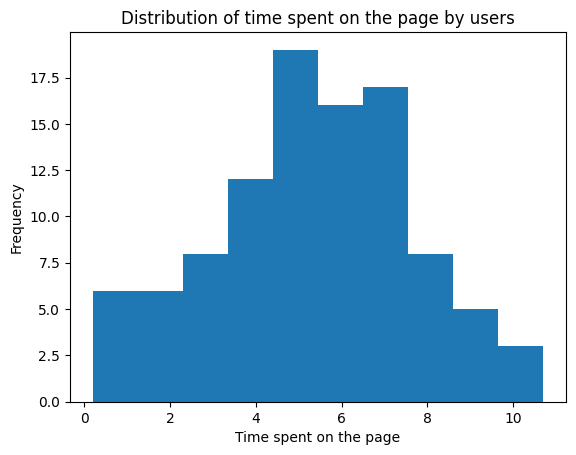

In [38]:
#Univariate analysis for time_spent_on_the_page
#Draw a distribution graph
plt.hist(data['time_spent_on_the_page'], bins=10)
plt.xlabel('Time spent on the page')
plt.ylabel('Frequency')
plt.title('Distribution of time spent on the page by users');

* The distribution shows an almost normal distributiton for this column
*

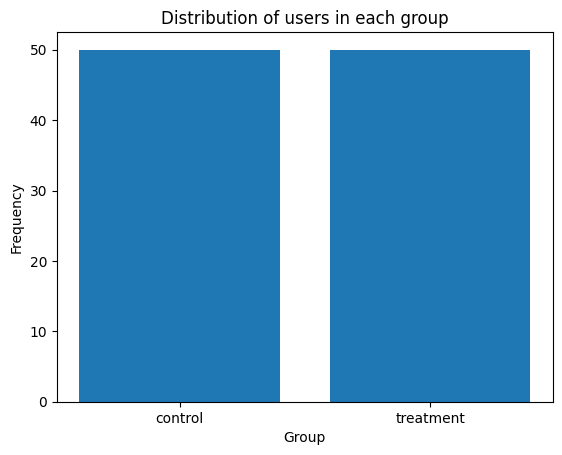

In [39]:
plt.bar(data['group'].value_counts().index, data['group'].value_counts())
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.title('Distribution of users in each group');

* There is an equal number of users for each of the control and treatment groups

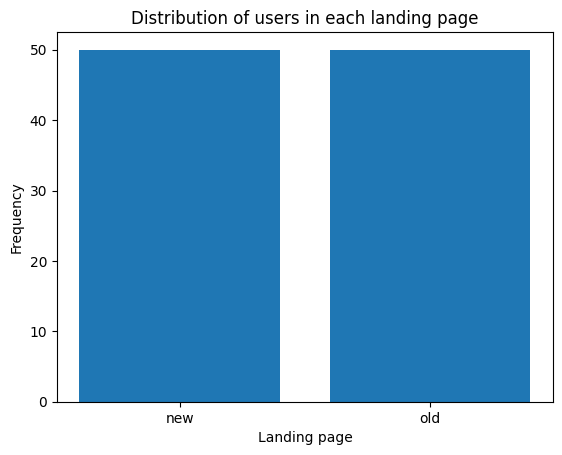

In [40]:
plt.bar(data['landing_page'].value_counts().index, data['landing_page'].value_counts())
plt.xlabel('Landing page')
plt.ylabel('Frequency')
plt.title('Distribution of users in each landing page');

* The is an equal distribution of users in each of the new and old pages

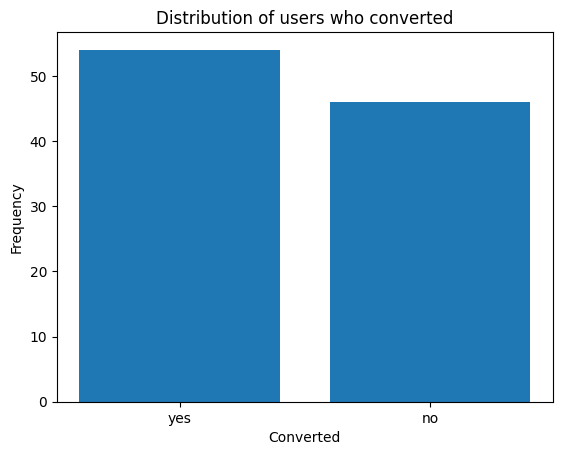

In [41]:
plt.bar(data['converted'].value_counts().index, data['converted'].value_counts())
plt.xlabel('Converted')
plt.ylabel('Frequency')
plt.title('Distribution of users who converted');

* Users who converted are a little more than those who did not convert

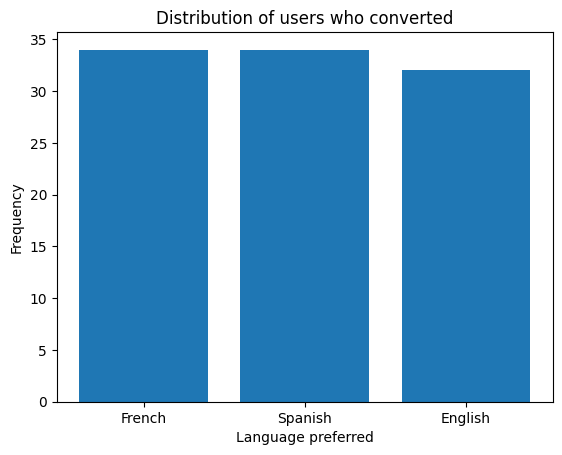

In [42]:
plt.bar(data['language_preferred'].value_counts().index, data['language_preferred'].value_counts())
plt.xlabel('Language preferred')
plt.ylabel('Frequency')
plt.title('Distribution of users who converted');

* There is an equal number of users who prefer spanish and French
* Fewer users prefer English

### Bivariate Analysis

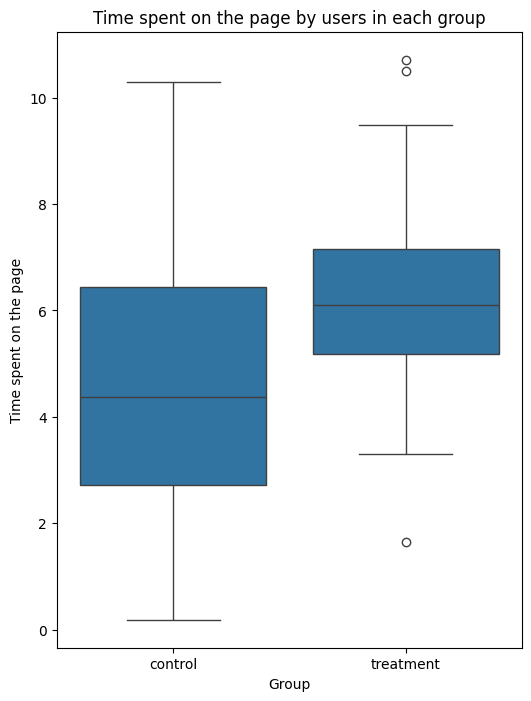

In [43]:
# Group vs time spent on the page
plt.figure(figsize=(6, 8))
sns.boxplot(x='group', y='time_spent_on_the_page', data=data)
plt.xlabel('Group')
plt.ylabel('Time spent on the page')
plt.title('Time spent on the page by users in each group');

*

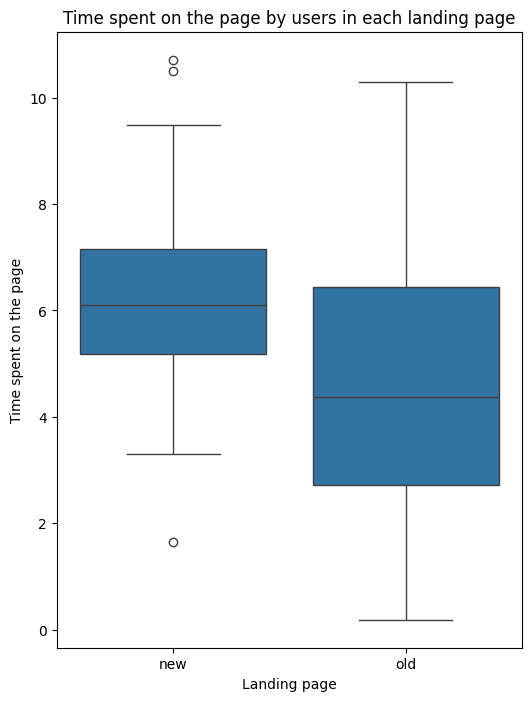

In [44]:
# Landing_page vs time spent on the page
plt.figure(figsize=(6, 8))
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=data)
plt.xlabel('Landing page')
plt.ylabel('Time spent on the page')
plt.title('Time spent on the page by users in each landing page');

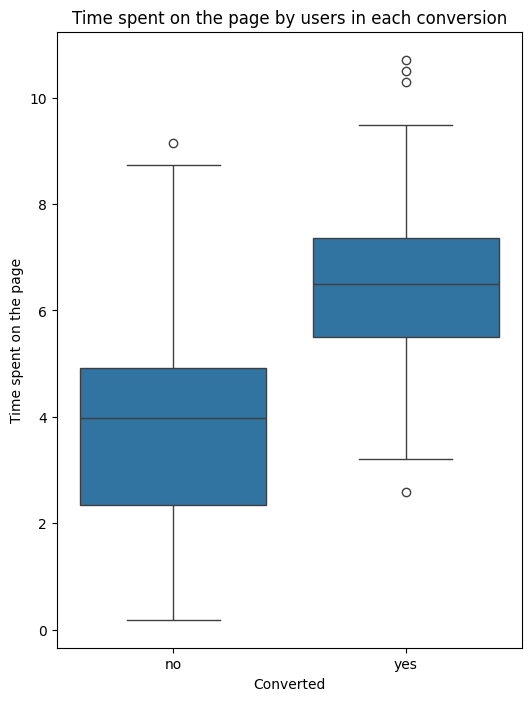

In [45]:
# Converted vs time spent on the page
plt.figure(figsize=(6, 8))
sns.boxplot(x='converted', y='time_spent_on_the_page', data=data)
plt.xlabel('Converted')
plt.ylabel('Time spent on the page')
plt.title('Time spent on the page by users in each conversion');

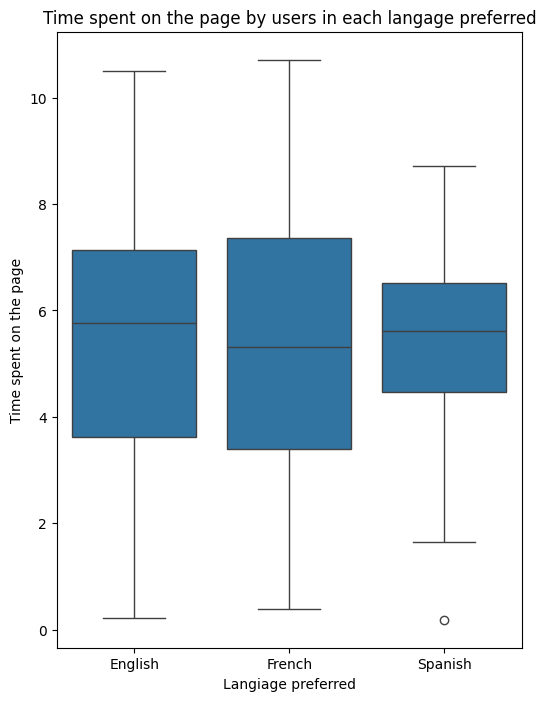

In [46]:
# Language preferred vs time spent on the page
plt.figure(figsize=(6, 8))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=data)
plt.xlabel('Langiage preferred')
plt.ylabel('Time spent on the page')
plt.title('Time spent on the page by users in each langage preferred');

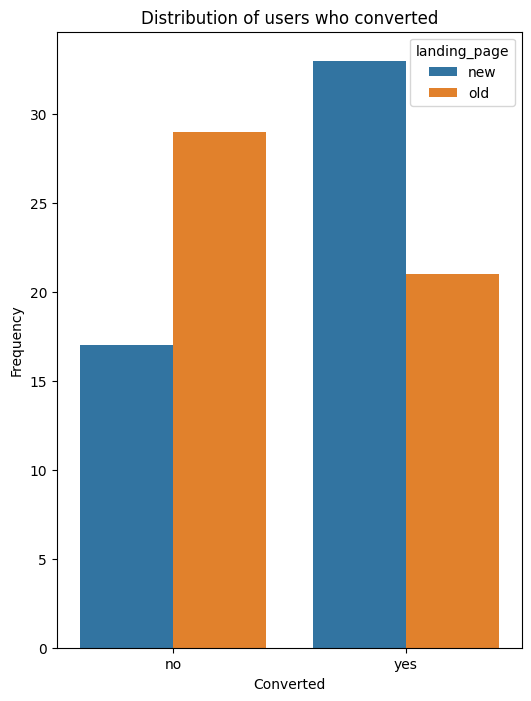

In [47]:
#Conversion vs landing page
plt.figure(figsize=(6, 8))
sns.countplot(x='converted', hue='landing_page', data=data)
plt.xlabel('Converted')
plt.ylabel('Frequency')
plt.title('Distribution of users who converted');

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

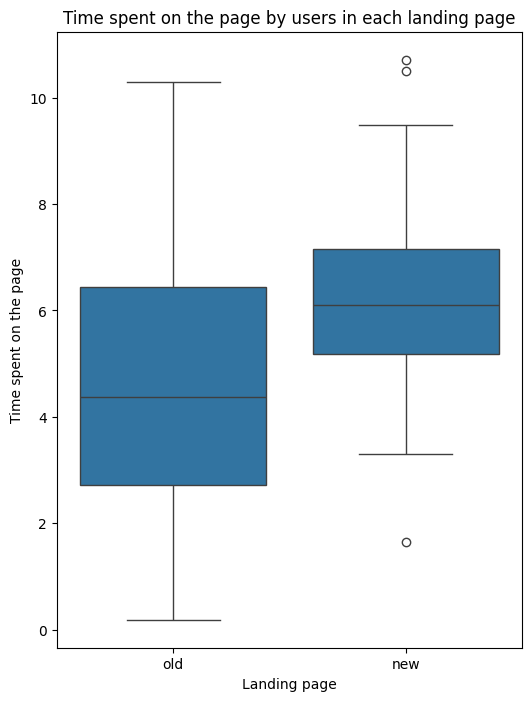

In [33]:
# Time spent on each landing page
plt.figure(figsize=(6, 8))
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=data)
plt.xlabel('Landing page')
plt.ylabel('Time spent on the page')
plt.title('Time spent on the page by users in each landing page');

### Step 1: Define the null and alternate hypotheses

The null hypothesis is:
>$H_0$: The mean time spent on the new landing page is at most equal to the mean time spent on the old landing page.

and the alternate hypothesis is:

>$H_a$: The mean time spent on the new landing page is greater than the mean time spent on the old landing page.

Let  $\mu$_n be the mean time spent on the new landing page and  $\mu$_o be the mean time spent on the old landing page

Therefore:

>$H_0$: $\mu$_n <= $\mu$_o

>$H_a$: $\mu$_n > $\mu$_o


### Step 2: Select Appropriate test

### Step 3: Decide the significance level

### Step 4: Collect and prepare data

### Step 5: Calculate the p-value

### Step 6: Compare the p-value with $\alpha$

### Step 7:  Draw inference

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

## 3. Is the conversion and preferred language are independent or related?

## 4. Is the time spent on the new page same for the different language users?

## Conclusion and Business Recommendations

___